# Recognizing handwritten digits

In [2]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [3]:
import matplotlib.pyplot as plt
import numpy as np

### Get data

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [5]:
print(f"X Train Shape: {X_train.shape}")
print(f"y Train Shape: {y_train.shape}")

print(f"X Test Shape: {X_test.shape}")
print(f"y Test Shape: {y_test.shape}")

X Train Shape: (60000, 28, 28)
y Train Shape: (60000,)
X Test Shape: (10000, 28, 28)
y Test Shape: (10000,)


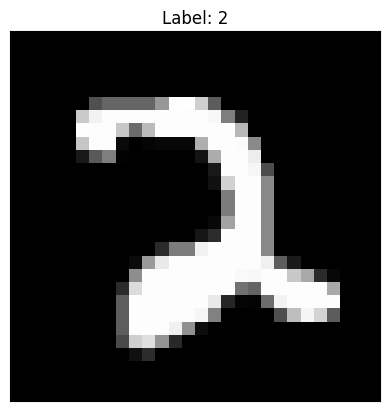

In [6]:
plt.imshow(X_train[4610], cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title(f"Label: {y_train[4610]}")
plt.show()

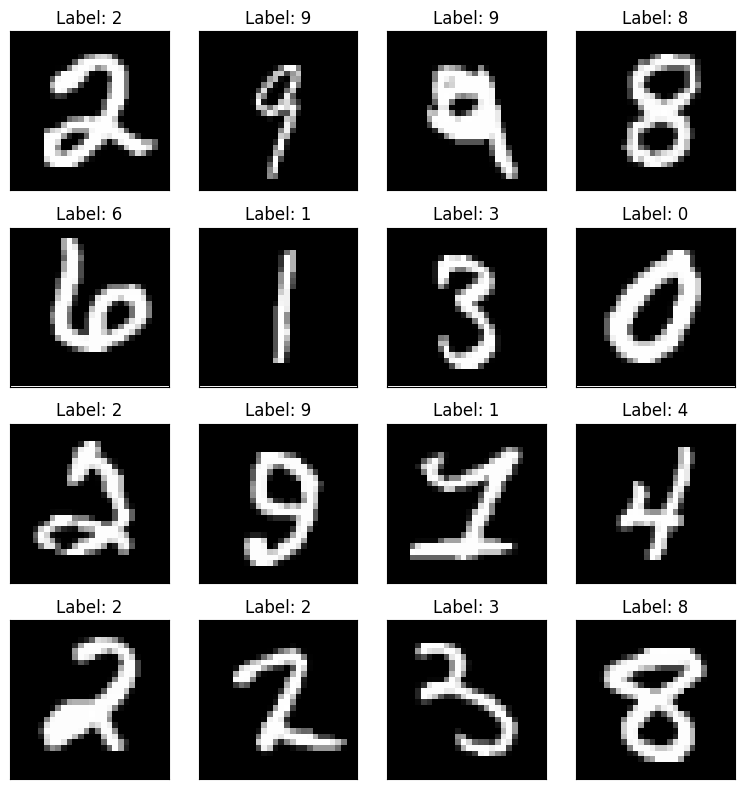

In [7]:
plt.figure(figsize=(8, 8))
n = 4
for i in range(n * n):
    plt.subplot(n, n, i + 1)
    random_idx = np.random.randint(0, X_train.shape[0])
    plt.imshow(X_train[random_idx], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(f"Label: {y_train[random_idx]}")
    plt.tight_layout()

plt.show()

### Y value transformation to array

In [8]:
Y_train = tf.keras.utils.to_categorical(y_train, 10)
Y_test = tf.keras.utils.to_categorical(y_test, 10)

In [9]:
print(y_train[6942])
print(Y_train[6942])

8
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [10]:
print(y_train[3897])
print(Y_train[3897])

1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


### Normalizing data

In [11]:
X_train_normalized = X_train / 255
X_test_normalized = X_test / 255

In [12]:
print(X_train[369])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 113 244 195   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    6  91 236 249  73   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  44   0   0   0   0   0   0
   23 252 252 150   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  47 238 152   0   0   

In [13]:
print(X_train_normalized[369])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

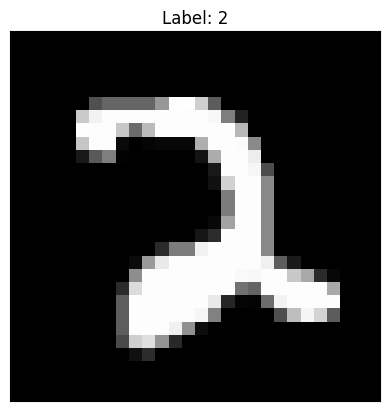

In [14]:
plt.imshow(X_train_normalized[4610], cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title(f"Label: {y_train[4610]}")
plt.show()

## Making the model (Sequential, using flatten and dense)

In [22]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(50, activation="relu"),
    Dense(50, activation="relu"),
    Dense(10, activation="softmax")
])

In [23]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,310 (165.27 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

In [33]:
history = model.fit(X_train_normalized, Y_train, batch_size=64, epochs=100)

Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 1.0000 - loss: 1.5220e-04
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 1.0000 - loss: 2.3713e-05
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 1.0000 - loss: 1.3115e-05
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 1.0000 - loss: 9.8289e-06
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 1.0000 - loss: 7.4802e-06
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 1.0000 - loss: 5.7943e-06
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 1.0000 - loss: 4.4610e-06
Epoch 8/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 1.0000 - loss: 3.4635e-06
Epoch 9/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 535us/step - accuracy: 1.0000 - loss: 2.7088e-06
Epoch 10/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.9957 - loss: 0.0200
Epoch 11/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.998

In [34]:
Y_hat = model.predict(X_test_normalized)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step


In [35]:
Y_hat[1976]

array([0.0000000e+00, 1.8043336e-29, 2.3254364e-20, 1.0000000e+00,
       0.0000000e+00, 2.4697768e-25, 0.0000000e+00, 1.7662193e-35,
       0.0000000e+00, 1.2936313e-24], dtype=float32)

In [36]:
np.argmax(Y_hat[1976])

np.int64(3)

In [37]:
y_hat = np.argmax(Y_hat, axis=-1)

In [39]:
test_accuracy = np.mean(y_hat == y_test)
print(y_hat)
print(test_accuracy)

[7 2 1 ... 4 5 6]
0.9734
